## Lab 3: Computer Vision
Hanna Svenson



Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

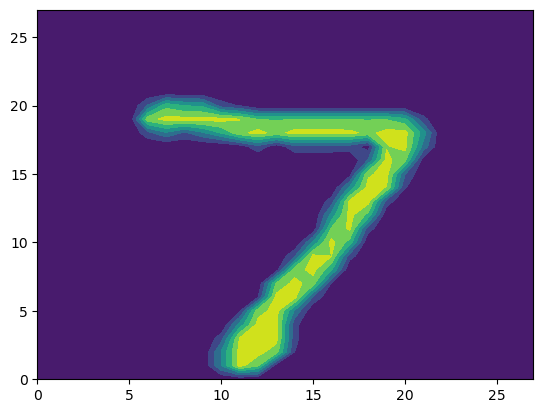

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

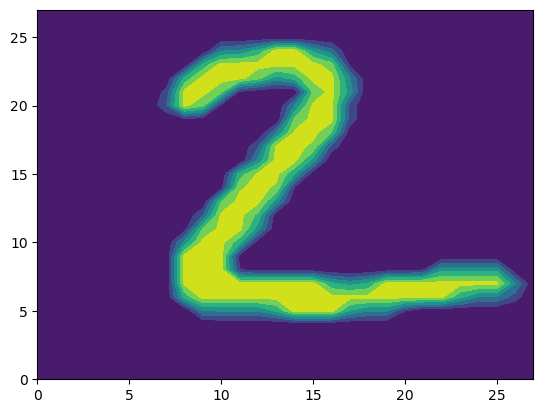

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

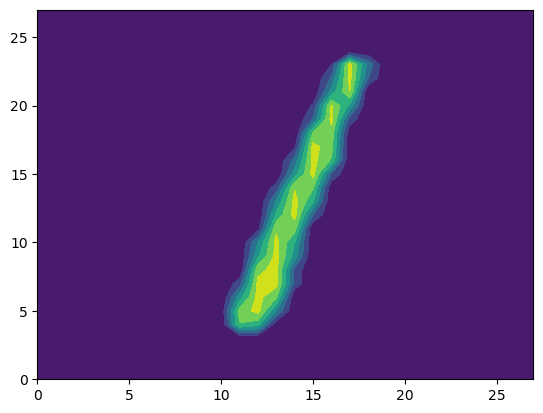

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

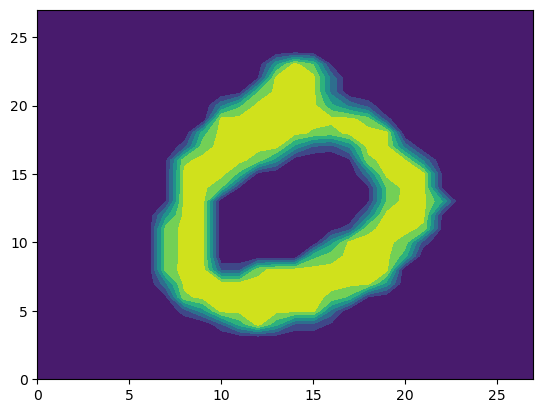

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

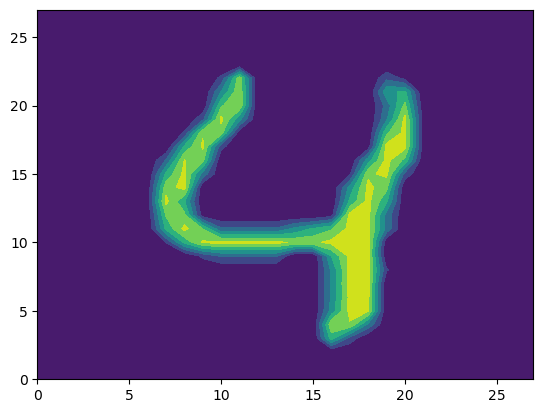

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?


In [21]:
print(X_train.shape)  
print(X_test.shape)   

# for x in X_train: 
#     print(x.shape)

#all shapes were 28 by 28
  
    
# for xx in X_test:
#     print(xx.shape)

#all shapes were 28 by 28

print(y_train.shape) 
print(y_test.shape)   

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).


In [22]:
X_train_reshaped = []
for i in range(60000):
    row = X_train[i].reshape((784)) 
    X_train_reshaped.append(row) 
X_train_reshaped = pd.DataFrame(X_train_reshaped)

X_train_reshaped.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train_reshaped.shape

(60000, 784)

In [24]:
X_test_reshaped = []
for i in range(10000):
    row = X_test[i].reshape((784)) # Turn the matrix for i into a row vector of features
    X_test_reshaped.append(row) # Append the row vector to the list
X_test_reshaped = pd.DataFrame(X_test_reshaped)

In [25]:
X_test_reshaped.shape

(10000, 784)

4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.


In [27]:
from sklearn.neighbors import KNeighborsClassifier

## Solve for k that maximizes accuracy:
k_bar = 50 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train_reshaped.values,y_train) 
    y_hat = fitted_model.predict(X_test_reshaped.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/len(y_test) # Accuracy on testing data
    
Acc_max = np.max(Acc) # highest recorded accuracy
max_index = np.where(Acc==Acc_max) 
k_star = max_index[0]+1 # Find the optimal value of k
print(k_star)

[3]


In [28]:
Acc

array([0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694, 0.967 , 0.9659, 0.9665, 0.9668, 0.9661, 0.9653, 0.964 , 0.9633, 0.9632, 0.963 , 0.9633, 0.9632, 0.9625, 0.963 , 0.9618, 0.9619, 0.9608, 0.9609, 0.9612, 0.9604, 0.9602, 0.9593, 0.9596, 0.9591, 0.9588, 0.9584, 0.9582, 0.9578, 0.9578, 0.9571, 0.9563, 0.9561, 0.956 , 0.9564, 0.9564, 0.9556, 0.955 , 0.9551, 0.9543, 0.9542, 0.9537, 0.9538, 0.9534])

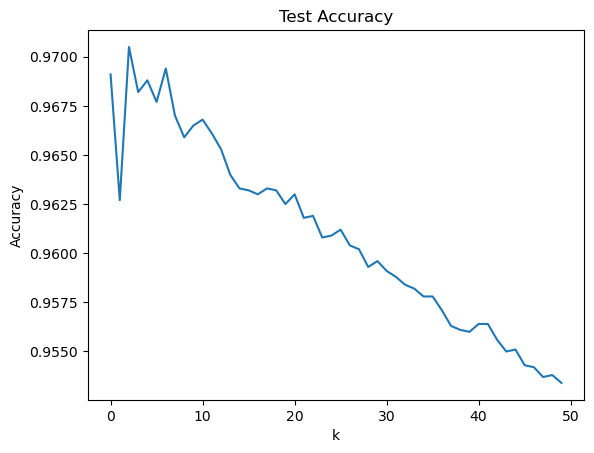

In [30]:
## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Test Accuracy')
plt.show()

5. For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.


In [31]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train_reshaped.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test_reshaped.values) # Predict values for test set
print(accuracy_max)

pd.crosstab(y_test, y_hat)

0.9705


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,10,9,996,2,0,0,0,13,2,0
3,0,2,4,976,1,13,1,7,3,3
4,1,6,0,0,950,0,4,2,0,19
5,6,1,0,11,2,859,5,1,3,4
6,5,3,0,0,3,3,944,0,0,0
7,0,21,5,0,1,0,0,991,0,10
8,8,2,4,16,8,11,3,4,914,4


6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

2 is often mistaken as 7.

3 is often mistaken as 5.

4 is often mistaken as 9.

5 is often mistaken as 3.

7 is often mistaken as 1 and 9. 

8 is often mistaken as 3 and 5.



These cases make sense as the numbers look similar. I find it interesting to see that 8 is confused for 3 and 5 frequently, but 3 and 5 are not frequently mistaken as 8. Just because there is overlap in the mistakes for 3 numbers does not necessarily mean that each of them is always mistaken as the other 2. 

7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

If each pixel has a color, this color can be broken down into its 3 values for R, G, and B. Then, we can have different matrices for each of these colors, and these colors can then be reshaped into a row for each observation. 